In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 232 from PyObject


In [5]:
X,y = load_breast_cancer().data, load_breast_cancer().target.reshape(-1,1)

In [65]:
class nn_sigmoid_sigmoid(object):
    def __init__(self, eta = 0.005, iterations = 1000, hidden = 20, epsilon = 0.01):
        self.eta = eta
        self.iterations = iterations
        self.hidden = hidden
        self.epsilon = epsilon
        
    def fit(self,X,y):
        w2_ = np.random.randn(1, self.hidden) * self.epsilon   # 1x20
        b2_ = np.zeros((1,1))                              # 1x1
        w1_ = np.random.randn(self.hidden, X.shape[1]) * self.epsilon # 20x 30
        b1_ = np.zeros((self.hidden,1))  # 20x 1
        cost_ = []
        acc_ = []
        m_ = len(y)
        X_ = X.T  # 30x 569
        y_ = y.T  #1 x 569
        i = 0
        while(i != self.iterations):
            Z1 = np.dot(w1_, X_) + b1_   #  20x30  30x 569 => 20x 569
            A1 = self.sigmoid(Z1) # 20x569
            Z2 = np.dot(w2_,A1) + b2_  #1x20 20x569 => 1x569
            A2 = self.sigmoid(Z2) # 1x569
            #cost
            cost = -(1/m_) * np.sum(y_*np.log(A2) + (1-y_)*np.log(1-A2))
            cost_.append(cost)
            acc = self.acc(y_,np.where(A2>0.5,1,0),m_)
            acc_.append(acc)
            #derivatives
            dZ2 = A2 - y_  # 1x500
            dW2 = (1/m_) * np.dot(dZ2,A1.T)  # 1x500 500x20 => 1x20
            dB2 = (1/m_) * np.sum(dZ2, axis =1 , keepdims=True) # 1x 1
            dZ1 = np.dot(w2_.T,dZ2) * (A1 * (1-A1)) # 20x1 1x500 = 20x500  (1x500)
            dW1 = (1/m_) * np.dot(dZ1,X_.T) #20x500 500x 15 => 20x 15
            dB1 = (1/m_) * np.sum(dZ1, axis =1 , keepdims=True)
            #updats
            w2_ -= self.eta * dW2
            b2_ -= self.eta * dB2
            w1_ -= self.eta * dW1
            b1_ -= self.eta * dB1
            if i % 100 == 0:
                print(f'epoch:{i}__acc{acc}__cost{cost}')
            i += 1 
        history = pd.DataFrame(cost_,columns=['cost'])
        history['acc'] = acc_
        history.plot(figsize = (14,5))
        plt.title('Cost Function')
        return w2_,b2_,w1_,b1_
        
        
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def acc(self,y_true,y_pred,m):
        return np.sum(y_true == y_pred)/m

epoch:0__acc0.6274165202108963__cost0.6879650304280606
epoch:100__acc0.6274165202108963__cost0.6051918666017498
epoch:200__acc0.7926186291739895__cost0.503072419025592
epoch:300__acc0.8154657293497364__cost0.4357399371106895
epoch:400__acc0.9050966608084359__cost0.3366231747466325
epoch:500__acc0.8681898066783831__cost0.35243767437133505
epoch:600__acc0.8523725834797891__cost0.36683526610003003
epoch:700__acc0.8892794376098418__cost0.3080999964168916
epoch:800__acc0.8892794376098418__cost0.30267771600543114
epoch:900__acc0.8927943760984183__cost0.2886862993380748
epoch:1000__acc0.9086115992970123__cost0.24686093360321812
epoch:1100__acc0.9103690685413005__cost0.2505990444127837
epoch:1200__acc0.9086115992970123__cost0.2468925970645287
epoch:1300__acc0.9138840070298769__cost0.24221627435546833
epoch:1400__acc0.9121265377855887__cost0.23787915945925328
epoch:1500__acc0.9138840070298769__cost0.23562943655551077
epoch:1600__acc0.9138840070298769__cost0.2315306991702524
epoch:1700__acc0.913

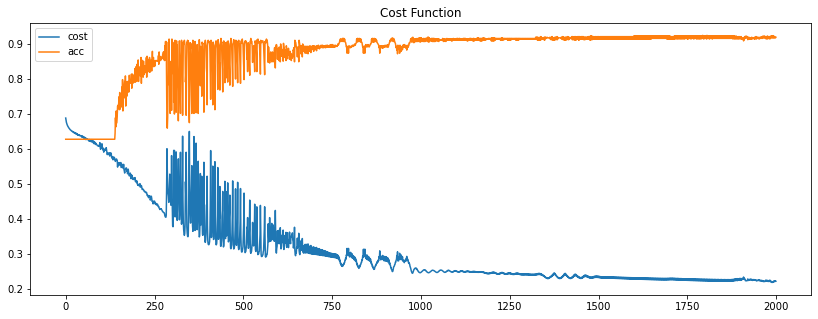

In [67]:
w2_,b2_,w1_,b1 = nn_sigmoid_sigmoid(eta=0.005, iterations= 2000, hidden=100, epsilon=0.01).fit(X,y)